## CIFAR10 그룹 프로젝트 연습

In [25]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from itertools import product
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers.experimental.preprocessing import RandomCrop, RandomFlip, RandomRotation



In [33]:
# 데이터 불러오기, 정리하기

from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

y_train = y_train.squeeze()
y_test = y_test.squeeze()

print(X_train.shape, X_test.shape,  y_train.shape, y_test.shape)

#X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2, random_state=0, stratify=y_train)
#print(X_train.shape, X_test.shape, X_val.shape, y_train.shape, y_test.shape, y_val.shape)

#plt.figure()
#plt.imshow(X_train[0], cmap='gray')



(50000, 32, 32, 3) (10000, 32, 32, 3) (50000,) (10000,)


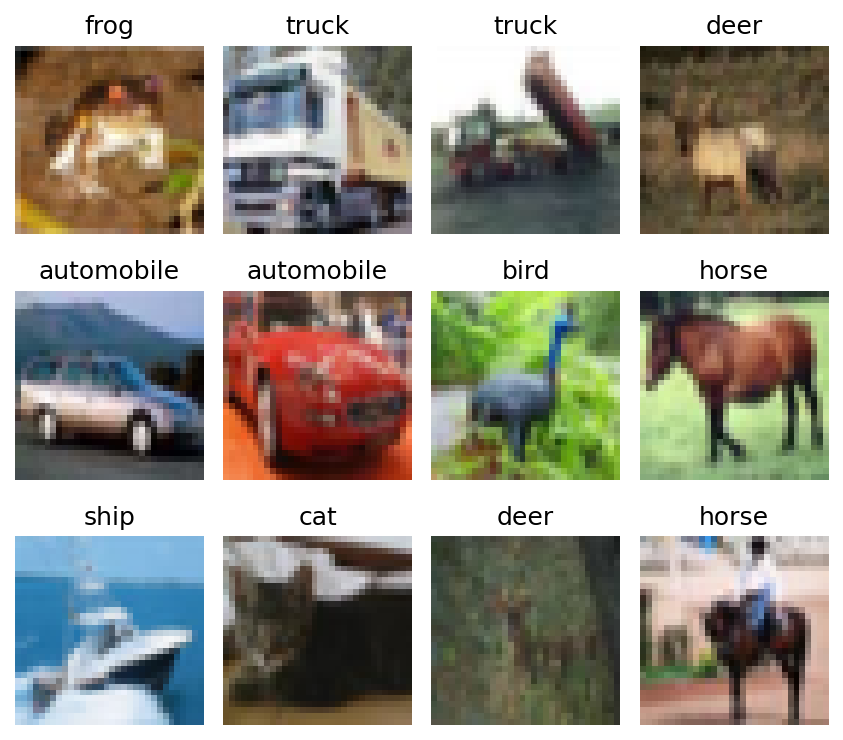

In [32]:
# 이미지 표시 방법

label_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck' }

#for image_idx in range(0,2):
#    plt.imshow(X_train[image_idx])
#    plt.title(label_dict[y_train[image_idx]])
#    plt.show()
    
plt.figure(figsize=(7,6), dpi=150)
n_rows, n_cols = 3, 4

for row_idx, col_idx in product(range(n_rows), range(n_cols)): # product 는 모든 행렬 조합 return
    image_idx = n_cols * row_idx + col_idx
    
    plt.subplot(n_rows, n_cols, image_idx+1)
    plt.imshow(X_train[image_idx])
    plt.title(label_dict[y_train[image_idx]])
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

In [42]:
# data dimension / size 줄이기 - PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train.reshape(-1,3072)) # 3072개 x 가 217개 로 줄어듬
print(X_train_reduced.shape, pca.explained_variance_ratio_.sum())

(50000, 217) 0.9502339220373435


In [40]:
# data dimension / size 줄이기 - kernel PCA

n_samples = 5000

kpca = KernelPCA(kernel='rbf', fit_inverse_transform=True)
X_train_kreduced = pca.fit_transform(X_train[:n_samples].reshape(-1,3072))
print(X_train_kreduced.shape)

(5000, 203)


In [41]:
# data dimension / size 줄이기 - t-SNE

n_samples = 5000

tsne = TSNE(n_components=2, random_state=0)
X_train_treduced = tsne.fit_transform(X_train[:n_samples].reshape(-1,3072))
print(X_train_treduced.shape)

(5000, 2)


(50, 32, 32, 3)


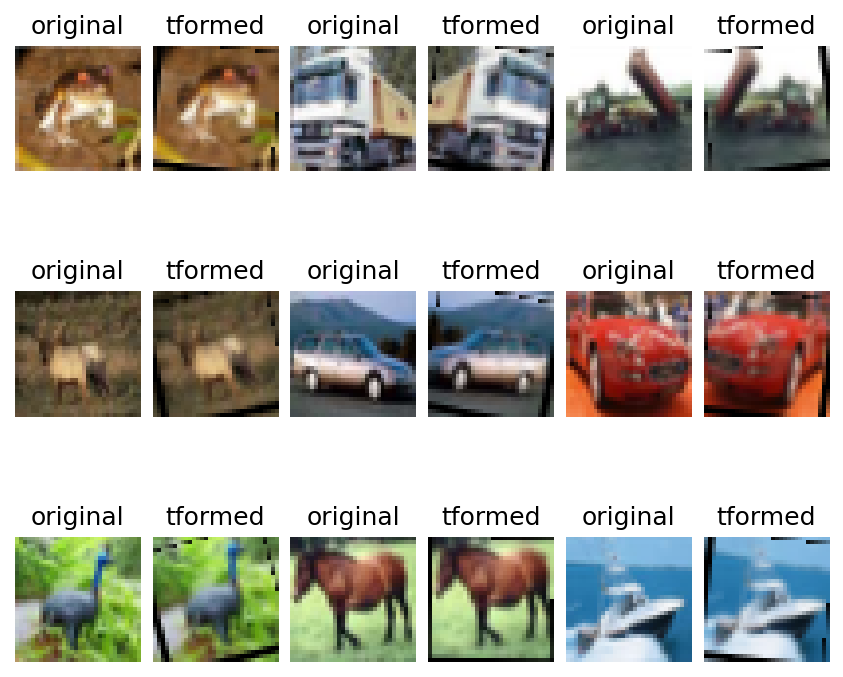

In [60]:
# data augmentation 

data_augmentation = Sequential()
data_augmentation.add(ZeroPadding2D(4, input_shape=(32,32,3)))    # zero padding
data_augmentation.add(RandomCrop(32,32))                          # crop
data_augmentation.add(RandomFlip('horizontal'))                   # filp
data_augmentation.add(RandomRotation(0.05))                       # rotation

X_train_transformed = data_augmentation(X_train[:50])
print(X_train_transformed.shape)

plt.figure(figsize=(7,6), dpi=150)
n_rows, n_cols = 3, 6

for row_idx, col_idx in product(range(n_rows), range(n_cols)): # product 는 모든 행렬 조합 return
    image_idx = n_cols * row_idx + col_idx
    
    plt.subplot(n_rows, n_cols, image_idx+1)
    if col_idx % 2 == 0:
        plt.imshow(X_train[image_idx // 2])
        plt.title('original')
    else:
        plt.imshow(X_train_transformed[image_idx // 2].numpy().reshape(32,32,3))
        plt.title('tformed')
    plt.axis('off')
    
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

TensorShape([50, 40, 40, 3])

In [11]:
# Alexnet 만들기

from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D

model_alex = Sequential()

#1st layer : [Conv]+[ReLU]+[Pool]
model_alex.add(Conv2D(input_shape=(32,32,3),   # 모르겠으면 X_train.shape 해서 그대로
                      kernel_size=(3,3),        # filter 크기
                      filters=48,
                      strides=(1,1),
                      padding='same',
                      activation='relu'))
model_alex.add(MaxPool2D(pool_size=(2,2),
                         strides=(2,2),
                         padding='valid'))

#2nd layer : [Conv]+[ReLU]+[Pool]
model_alex.add(Conv2D(kernel_size=(3,3),
                      filters=96,
                      strides=(1,1),
                      padding='same',
                      activation='relu'))
model_alex.add(MaxPool2D(pool_size=(2,2),
                         strides=(2,2),
                         padding='valid'))

#3rd layer
model_alex.add(Conv2D(kernel_size=(3,3),
                      filters=192,
                      strides=(1,1),
                      padding='same',
                      activation='relu'))

#4th layer
model_alex.add(Conv2D(kernel_size=(3,3),
                      filters=192,
                      strides=(1,1),
                      padding='same',
                      activation='relu'))

#5th layer : [Conv]+[ReLU]+[Pool]
model_alex.add(Conv2D(kernel_size=(3,3),
                      filters=256,
                      strides=(1,1),
                      padding='same',
                      activation='relu'))
model_alex.add(MaxPool2D(pool_size=(2,2),
                         strides=(2,2),
                         padding='valid'))

#6th layer
model_alex.add(Flatten())                         # input_shape 은 처음에만 
model_alex.add(Dense(512, activation='relu'))

#7th layer
model_alex.add(Dense(256, activation='relu'))

#output
model_alex.add(Dense(10, activation='softmax'))

model_alex.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
model_alex.fit(X_train.reshape(-1,32,32,3), y_train, epochs=1, verbose=0)

In [12]:
# model_alex 확인

model=model_alex

(test_loss, test_acc) = model.evaluate(X_test.reshape(-1,32,32,3),y_test)
print('{:.2f}%\n'.format(100*test_acc))

print(model.predict(X_test[0].reshape(1,32,32,3)))

model.layers

313/313 [==============================] - 6s 20ms/step - loss: 1.3284 - acc: 0.5219: 3s - ETA: 1s -
52.19%

[[0.00631083 0.00304297 0.10780736 0.40681148 0.07244006 0.2916972
  0.08186857 0.02167933 0.00532728 0.00301484]]
